# 1. 패키지 import 및 데이터 경로 설정

In [1]:
import numpy as np
import pandas as pd
import pdb
import os, sys
import matplotlib.pyplot as plt

In [2]:
data_path = f"{os.getcwd()}/data/BookRecommendation"

In [3]:
os.listdir(data_path)

['Books.csv',
 'recsys_taxonomy2.png',
 'DeepRec.png',
 'Ratings.csv',
 'classicRec.png',
 'Users.csv']

In [4]:
books_df = pd.read_csv(f'{data_path}/Books.csv', low_memory=False)
ratings_df = pd.read_csv(f'{data_path}/Ratings.csv')
users_df = pd.read_csv(f'{data_path}/Users.csv')

# 2. 데이터 불러오기

In [5]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
df_li = [books_df, ratings_df, users_df]

for df in df_li:
    print(df.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
# 우선, Rating = 0인 거 자체를 안 씀 (Implicit feedback data)
ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]

In [10]:
from sklearn.utils import shuffle

ratings_df = shuffle(ratings_df, random_state=42)

# 3. Surprise로 기본적인 알고리즘 테스트
* KNN, KNN with Means
```
Model = KNNBasic             | K = 10 | Sim = pearson | RMSE = 1.8947
Model = KNNWithMeans         | K = 10 | Sim = pearson | RMSE = 1.8140
Model = KNNBasic             | K = 20 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 20 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 40 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 40 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 80 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 80 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 160 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 160 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 320 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 320 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 640 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 640 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 1280 | Sim = pearson | RMSE = 1.8946
Model = KNNWithMeans         | K = 1280 | Sim = pearson | RMSE = 1.8139
Model = KNNBasic             | K = 10 | Sim = cosine | RMSE = 1.8947
Model = KNNWithMeans         | K = 10 | Sim = cosine | RMSE = 1.8140
Model = KNNBasic             | K = 20 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 20 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 40 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 40 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 80 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 80 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 160 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 160 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 320 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 320 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 640 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 640 | Sim = cosine | RMSE = 1.8139
Model = KNNBasic             | K = 1280 | Sim = cosine | RMSE = 1.8946
Model = KNNWithMeans         | K = 1280 | Sim = cosine | RMSE = 1.8139
```

In [11]:
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader

x = ratings_df.copy()

reader = Reader(rating_scale=(1, 10))

from sklearn.utils import shuffle
x = shuffle(x, random_state=42)
cutoff = int(0.75 * len(x))
x_train = x.iloc[:cutoff]
x_train = Dataset.load_from_df(x_train[['User-ID', 'ISBN', 'Book-Rating']], reader).build_full_trainset()
x_test = x.iloc[cutoff:]
x_test = Dataset.load_from_df(x_test[['User-ID', 'ISBN', 'Book-Rating']], reader).build_full_trainset().build_testset()

In [12]:
from surprise import accuracy
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans

model_dict = {
    "KNNBasic": KNNBasic,
    "KNNWithMeans": KNNWithMeans,
}

sim_li = [
    'pearson',
    'cosine'
]

# 아래 반복문에 대한 결과는 위 마크다운에 기록하였음
# 오래 걸려서 결과만 기록하고, 주석 처리 해둠
'''
for sim in sim_li:
    for k in [10, 20, 40, 80, 160, 320, 640, 1280]:
        for key, model in model_dict.items():
            # 알고리즘 옵션 변경, 정확도 계산
            sim_options = {'name': 'pearson_baseline',
                           'user_based': True}
            
            algo = model(k=k, sim_options=sim_options, verbose=False)
            algo.fit(x_train)
            
            predictions = algo.test(x_test, verbose=False)
            
            print(f"Model = {key:20s} | K = {k} | Sim = {sim} | RMSE = {accuracy.rmse(predictions, verbose=False):.4f}")
'''

'\nfor sim in sim_li:\n    for k in [10, 20, 40, 80, 160, 320, 640, 1280]:\n        for key, model in model_dict.items():\n            # 알고리즘 옵션 변경, 정확도 계산\n            sim_options = {\'name\': \'pearson_baseline\',\n                           \'user_based\': True}\n            \n            algo = model(k=k, sim_options=sim_options, verbose=False)\n            algo.fit(x_train)\n            \n            predictions = algo.test(x_test, verbose=False)\n            \n            print(f"Model = {key:20s} | K = {k} | Sim = {sim} | RMSE = {accuracy.rmse(predictions, verbose=False):.4f}")\n'

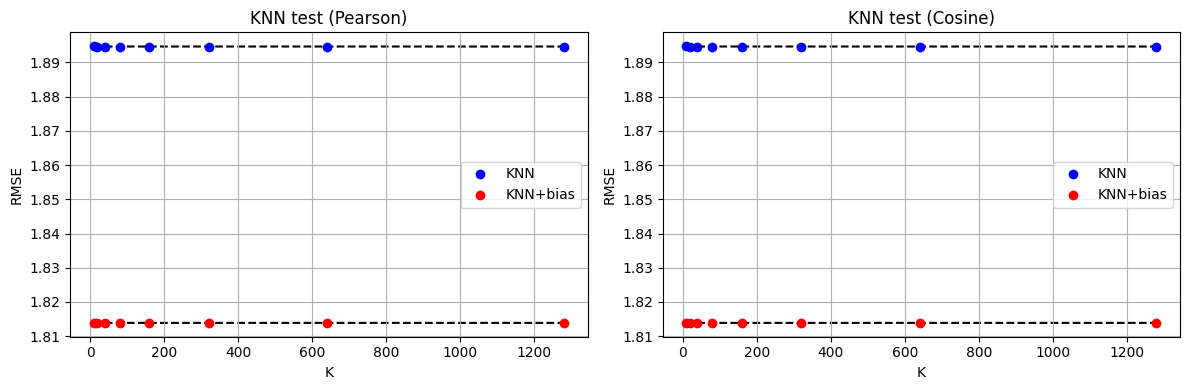

In [13]:
K = [10, 20, 40, 80, 160, 320, 640, 1280]
knn_basics_rmse_pearson = [1.8947, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946]
knn_with_means_rmse_pearson = [1.8140, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139]

knn_basics_rmse_cosine = [1.8947, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946, 1.8946]
knn_with_means_rmse_cosine = [1.8140, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139, 1.8139]

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)

plt.title("KNN test (Pearson)")
plt.grid(zorder=1)

plt.plot(K, knn_basics_rmse_pearson, color='black', linestyle='--', zorder=1)
plt.scatter(K, knn_basics_rmse_pearson, label="KNN", color='blue', zorder=2)

plt.plot(K, knn_with_means_rmse_pearson, color='black', linestyle='--', zorder=1)
plt.scatter(K, knn_with_means_rmse_pearson, label="KNN+bias", color='red', zorder=2)

plt.ylabel('RMSE')
plt.xlabel('K')

plt.legend()

plt.subplot(1, 2, 2)

plt.title("KNN test (Cosine)")
plt.grid(zorder=1)

plt.plot(K, knn_basics_rmse_pearson, color='black', linestyle='--', zorder=1)
plt.scatter(K, knn_basics_rmse_pearson, label="KNN", color='blue', zorder=2)

plt.plot(K, knn_with_means_rmse_pearson, color='black', linestyle='--', zorder=1)
plt.scatter(K, knn_with_means_rmse_pearson, label="KNN+bias", color='red', zorder=2)

plt.ylabel('RMSE')
plt.xlabel('K')

plt.legend()

plt.tight_layout()
plt.savefig("assets/EDA_results/KNN results.jpg", dpi=500)

77805
2677
75128


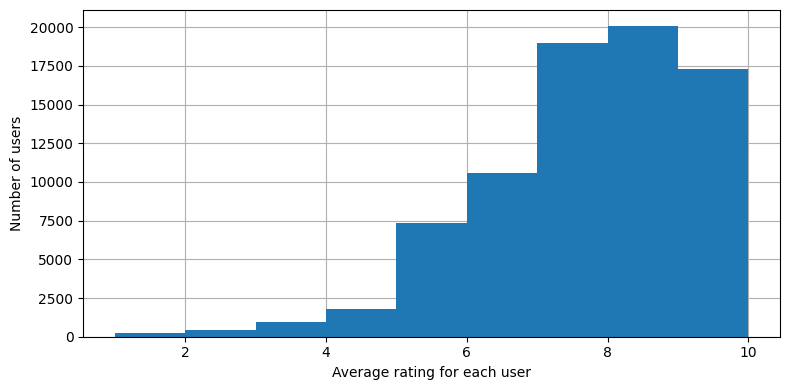

In [14]:
plt.figure(figsize=(8, 4))

plt.grid(zorder=1)
plt.hist(ratings_df.groupby('User-ID')['Book-Rating'].mean(), bins=9, zorder=2)

plt.ylabel('Number of users')
plt.xlabel('Average rating for each user')

plt.tight_layout()
plt.savefig('assets/EDA_results/average_rating_for_each_user.jpg', dpi=500)

temp_df = ratings_df.groupby('User-ID')['Book-Rating'].mean()
print(len(temp_df))
print(len(temp_df[(temp_df >= 2.0) & (temp_df <= 4.0)]))
print(len(temp_df) - len(temp_df[(temp_df >= 2.0) & (temp_df <= 4.0)]))

# 4. 모델 저장 및 로드
* 저장하지 말자. 하나에 30GB 정도를 차지한다.

In [15]:
# KNN Basic 학습
# Sim Pearson, K=20 = 이후 성능 다 똑같아서
sim_options={'name': 'pearson_baseline',
             'user_based': True}

model1 = KNNBasic(k=20, sim_options=sim_options, verbose=True)
model2 = KNNWithMeans(k=20, sim_options=sim_options, verbose=True)

model1.fit(x_train)
model2.fit(x_train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
from surprise import dump

# dump.dump('saved/weights/knn.book.pkl', algo=model1)
# dump.dump('saved/weights/knn_bias.book.pkl', algo=model2)

# 5. 평가

In [20]:
from collections import defaultdict
import math

def evaluate_surprise_topk(algo, testset, K=10, threshold=7.0):
    """
    algo: Surprise 모델 (fit 된 상태)
    testset: list of (uid, iid, true_r) 형식
    """
    # 먼저 예측 수행
    predictions = algo.test(testset)

    # user별 데이터 저장
    user_preds = defaultdict(list)
    user_targets = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        user_preds[uid].append((iid, est))
        user_targets[uid].append((iid, true_r))

    precision_list = []
    recall_list = []
    ndcg_list = []

    for u in user_preds:

        # Top-K 예측
        top_k_items = sorted(user_preds[u], key=lambda x: -x[1])[:K]
        top_k_idx = [i for i, _ in top_k_items]

        # 실제 positive
        relevance_dict = {i: 1 if r >= threshold else 0 for i, r in user_targets[u]}
        relevant_items = [i for i, r in user_targets[u] if r >= threshold]

        # Precision@K
        num_rel_topk = sum(relevance_dict[i] for i in top_k_idx)
        precision = num_rel_topk / K
        precision_list.append(precision)

        # Recall@K
        recall = num_rel_topk / len(relevant_items) if len(relevant_items) > 0 else 0
        recall_list.append(recall)

        # NDCG@K
        dcg = 0
        for idx, i in enumerate(top_k_idx):
            rel = relevance_dict[i]
            dcg += (2**rel - 1) / math.log2(idx + 2)

        idcg = 0
        ideal_rels = [1] * len(relevant_items)   # relevant는 모두 rel=1
        for idx, rel in enumerate(ideal_rels[:K]):
            idcg += (2**rel - 1) / math.log2(idx + 2)

        ndcg = dcg / idcg if idcg > 0 else 0
        ndcg_list.append(ndcg)

    return {
        "Precision@K": sum(precision_list) / len(precision_list),
        "Recall@K": sum(recall_list) / len(recall_list),
        "NDCG@K": sum(ndcg_list) / len(ndcg_list),
    }

In [22]:
result = evaluate_surprise_topk(model1, x_test, K=10, threshold=7)
print("========RESULT========")
for key, value in result.items():
    print(f"{key}: {value:.4f}")

result = evaluate_surprise_topk(model2, x_test, K=10, threshold=7)
print("========RESULT========")
for key, value in result.items():
    print(f"{key}: {value:.4f}")

========RESULT========
Precision@K: 0.1687
Recall@K: 0.7846
NDCG@K: 0.7720
========RESULT========
Precision@K: 0.1684
Recall@K: 0.7844
NDCG@K: 0.7707


In [23]:
result = evaluate_surprise_topk(model1, x_test, K=5, threshold=7)
print("========RESULT========")
for key, value in result.items():
    print(f"{key}: {value:.4f}")

result = evaluate_surprise_topk(model2, x_test, K=5, threshold=7)
print("========RESULT========")
for key, value in result.items():
    print(f"{key}: {value:.4f}")

========RESULT========
Precision@K: 0.2788
Recall@K: 0.7553
NDCG@K: 0.7670
========RESULT========
Precision@K: 0.2781
Recall@K: 0.7546
NDCG@K: 0.7653
